In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
dataset = pd.read_excel('C:/DA/Assignment_Py/CC-3Y-Transactions.xlsx')
dataset = pd.read_excel('C:/DA/Assignment_Py/CC-3Y-Transactions.xlsx', sheet_name='Credit-Card-Transactions')
dataset['Year'] = pd.DatetimeIndex(dataset['Date']).year
dataset['Month'] = pd.DatetimeIndex(dataset['Date']).month
dataset['Quarter'] = pd.DatetimeIndex(dataset['Date']).quarter
dataset.dropna()

,City,Date,Card Type,Exp Type,Gender,Amount,Year,Month,Quarter
0,"Delhi, India",2014-10-29,Gold,Bills,F,82475,2014,10,4
1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555,2014,8,3
2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738,2014,8,3
3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424,2014,4,2
4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574,2015,5,2
...,...,...,...,...,...,...,...,...,...
26047,"Kolkata, India",2014-06-22,Silver,Travel,F,128191,2014,6,2
26048,"Pune, India",2014-08-03,Signature,Travel,M,246316,2014,8,3
26049,"Hyderabad, India",2015-01-16,Silver,Travel,M,265019,2015,1,1
26050,"Kanpur, India",2014-09-14,Silver,Travel,M,88174,2014,9,3


# **Top 5 cities Expenses**

In [5]:
group_2013 = dataset[dataset.Year == 2013]
group_by_city_2013 = group_2013.groupby(["Year","City"])["Amount"].sum().reset_index(name="Sum")
top_5_city_2013=group_by_city_2013.sort_values(by="Sum", ascending=False).head(5)
top_5_city_2013

,Year,City,Sum
45,2013,"Bengaluru, India",84999287
102,2013,"Greater Mumbai, India",84735652
7,2013,"Ahmedabad, India",83291837
77,2013,"Delhi, India",82126961
145,2013,"Kanpur, India",19640338


In [6]:
group_2014 = dataset[dataset.Year == 2014]
group_by_city_2014 = group_2014.groupby(["Year","City"])["Amount"].sum().reset_index(name="Sum")
top_5_city_2014=group_by_city_2014.sort_values(by="Sum", ascending=False).head(5)
top_5_city_2014

,Year,City,Sum
69,2014,"Bengaluru, India",351482095
163,2014,"Greater Mumbai, India",349709415
8,2014,"Ahmedabad, India",348289187
121,2014,"Delhi, India",329591186
184,2014,"Hyderabad, India",71066005


In [7]:
group_2015 = dataset[dataset.Year == 2015]
group_by_city_2015 = group_2015.groupby(["Year","City"])["Amount"].sum().reset_index(name="Sum")
top_5_city_2015=group_by_city_2015.sort_values(by="Sum", ascending=False).head(5)
top_5_city_2015

,Year,City,Sum
95,2015,"Delhi, India",145211065
128,2015,"Greater Mumbai, India",142306409
6,2015,"Ahmedabad, India",136213286
53,2015,"Bengaluru, India",135845357
210,2015,"Kolkata, India",30918731


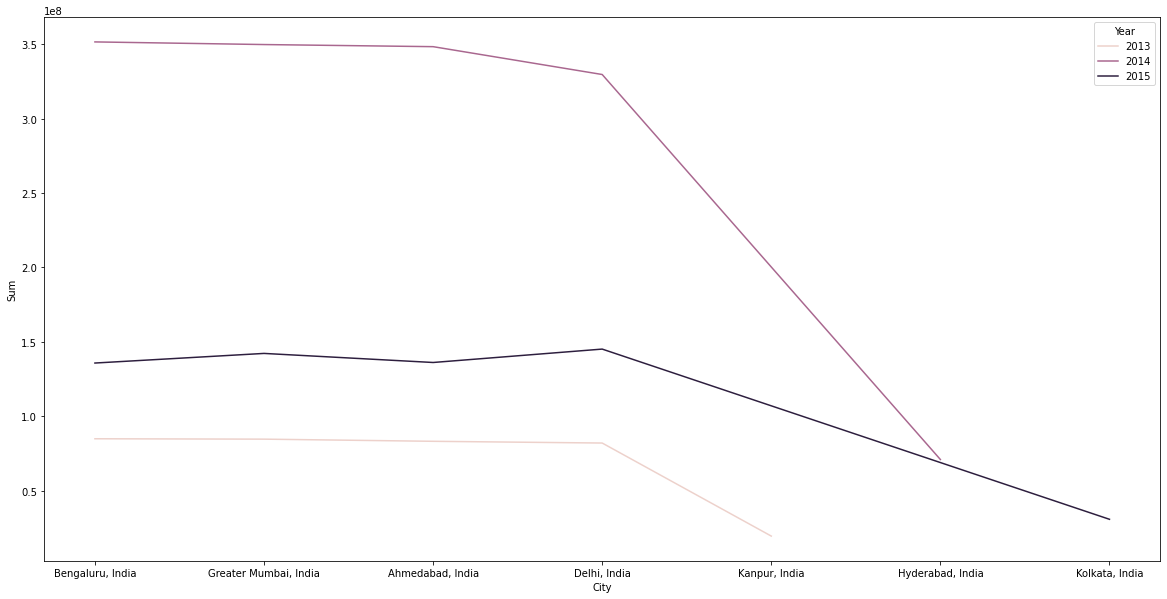

In [8]:
dataset_con = pd.concat([top_5_city_2013, top_5_city_2014, top_5_city_2015])

plt.figure(figsize=(20,10))
sns.lineplot(x=dataset_con['City'], y=dataset_con['Sum'], hue = dataset_con['Year'], data = dataset_con)

plt.show()

# **Gender - Expense Analysis**

In [9]:
group_by_gender = dataset.groupby([dataset.Year,dataset.Gender, dataset.Quarter])["Amount"].sum().reset_index(name="Sum")
group_by_gender

sum_year = []
for i in group_by_gender.values.tolist():
	sum_year.append(i[0])

sum_year = list(set(sum_year))

dictionary_list = []
for i in sum_year:
	data = {
		'year' : i,
		'F' : [
			{
				'quarter' : 1,
				'sum' : None
			},
			{
				'quarter' : 2,
				'sum' : None
			},
			{
				'quarter' : 3,
				'sum' : None
			},
			{
				'quarter' : 4,
				'sum' : None
			}
		],
		'M' : [
			{
				'quarter' : 1,
				'sum' : None
			},
			{
				'quarter' : 2,
				'sum' : None
			},
			{
				'quarter' : 3,
				'sum' : None
			},
			{
				'quarter' : 4,
				'sum' : None
			}
		]
	}

	dictionary_list.append(data)

for i in group_by_gender.values.tolist():
	for j in dictionary_list:
		if i[0] == j['year']:
			j[i[1].upper()][int(i[2]-1)]['sum'] = i[3]

for i in dictionary_list:

	for male in i['M']:
		if male['sum'] == None:
			male['sum'] = 0
	for female in i['F']:
		if female['sum'] == None:
			female['sum'] = 0


int_list = []

for i in dictionary_list:
	for male in i['M']:
		tmp_male = [i['year'],'M',male['quarter'],male['sum']]
		int_list.append(tmp_male)

	for female in i['F']:
		tmp_female = [i['year'],'F',female['quarter'],female['sum']]
		int_list.append(tmp_female)

fin_list = pd.DataFrame(int_list,columns =['Year', 'Gender', 'Quarter', 'Sum'])
fin_list

,Year,Gender,Quarter,Sum
0,2013,M,1,0
1,2013,M,2,0
2,2013,M,3,0
3,2013,M,4,280221976
4,2013,F,1,0
5,2013,F,2,0
6,2013,F,3,0
7,2013,F,4,333421908
8,2014,M,1,281336181
9,2014,M,2,269947023


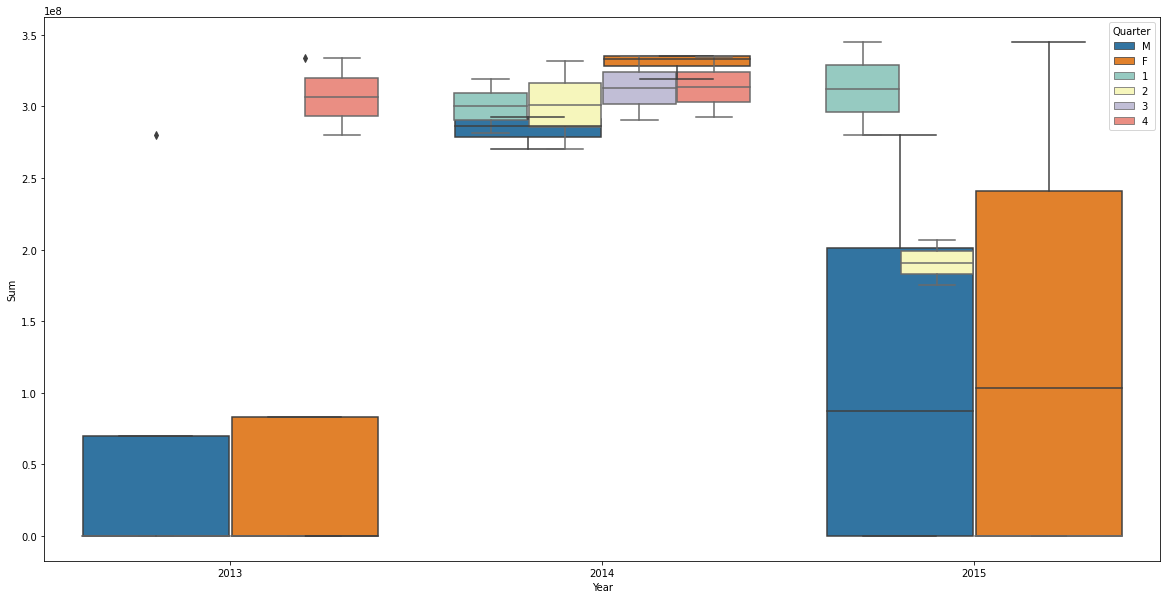

In [35]:
plt.figure(figsize=(20,10))

ax = sns.boxplot(x=fin_list['Year'], y=fin_list['Sum'], hue=fin_list['Gender'])

sns.boxplot(x=fin_list['Year'], y=fin_list['Sum'], hue=fin_list['Quarter'], ax=ax, palette="Set3")

## **Top 3 Expenses Analysis**

In [45]:
group_2013 = dataset[dataset.Year == 2013]
group_by_exp_2013 = group_2013.groupby(["Year","Exp Type"])["Amount"].sum().reset_index(name="Sum")
top_3_exp_2013=group_by_exp_2013.sort_values(by="Sum").head(3)
top_3_exp_2013

,Year,Exp Type,Sum
5,2013,Travel,15353606
4,2013,Grocery,111806890
1,2013,Entertainment,113094669


In [46]:
group_2014 = dataset[dataset.Year == 2014]
group_by_exp_2014 = group_2014.groupby(["Year","Exp Type"])["Amount"].sum().reset_index(name="Sum")
top_3_exp_2014=group_by_exp_2014.sort_values(by="Sum").head(3)
top_3_exp_2014

,Year,Exp Type,Sum
5,2014,Travel,65532848
4,2014,Grocery,428628961
1,2014,Entertainment,443730570


In [47]:
group_2015 = dataset[dataset.Year == 2015]
group_by_exp_2015 = group_2015.groupby(["Year","Exp Type"])["Amount"].sum().reset_index(name="Sum")
top_3_exp_2015=group_by_exp_2015.sort_values(by="Sum").head(3)
top_3_exp_2015

,Year,Exp Type,Sum
5,2015,Travel,28369157
1,2015,Entertainment,169612297
4,2015,Grocery,177772072


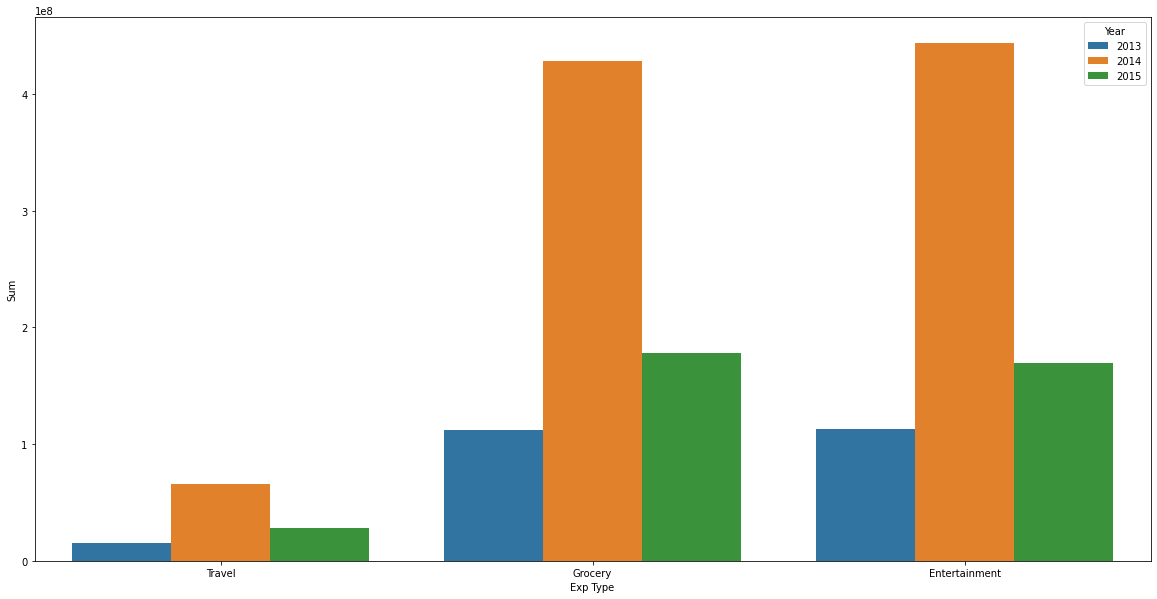

In [48]:
dataset_res_3 = pd.concat([top_3_exp_2013, top_3_exp_2014, top_3_exp_2015])

plt.figure(figsize=(20,10))
sns.barplot(x=dataset_res_3['Exp Type'], y=dataset_res_3['Sum'], hue = dataset_res_3['Year'], data = dataset_res_3)

plt.show()